<center>
<h1 style="font-family:verdana">
 💻 🧑 Reconeixement d'entitats anomenades 🧑 💻


<p> 🎯 <b>Objectiu</b>: en aquesta segona part de la pràctica aprendrem a reconèixer entitats anomenades, és a dir, identificar i classificar entitats en una oració que poden ser (en el context de reserva de vols) la ciutat de sortida o d'arribada, la data del mes i el dia, si es de negocis o turista o altres categories específiques. Aquesta tasca se sol plantejar etiquetant cada paraula amb una etiqueta de la categoria de l'entitat a la qual correspon.

Tant la classificació d'intencions (tasca estudiada a la primera part) com el reconeixement d'entitats anomenades (Name Entity Recognition, NER) que veurem en aquesta part són components crucials dels sistemes de processament del llenguatge natural (Natural Language Processing, NLP) i sovint s'utilitzen junts per crear aplicacions d'intel·ligència artificial (IA) conversacionals més sofisticades. Per exemple, en un xatbot, la classificació d'intencions ajuda a entendre la intenció principal de l'usuari, mentre que el reconeixement d'entitats anomenades ajuda a extreure entitats rellevants per proporcionar respostes més contextualitzades.


<p> ✨ <b>Contingut</b>: els passos d'aquesta segona part seran similars a la primera. En primer lloc, analitzarem el conjunt de dades. En segon lloc, prepararem les dades per a poder entrenar el model. I finalment dissenyarem l'arquitectura i entrenarem el model. </p>


<p> ✏ <b>Exercicis</b>: en cada secció anireu trobant exercicis que haureu d'anar resolent. </p>

---

<h2> Índex </h2>

1. [Inspecció del conjunt de dades](#section-one)
  * [Exercici 1](#ex-one)
  * [Exercici 2](#ex-two)
2. [Preprocessament de dades](#section-two)
  * [Exercici 3](#ex-three)
  * [Exercici 4](#ex-four)
3. [Disseny del model i entrenament](#section-three)
  * [Exercici 5](#ex-five)
  * [Exercici 6](#ex-six)
4. [Lliurable](#section-four)

---

In [1]:
# ⚠️ NOTA: La primera importación de TensorFlow puede tardar 30-60 segundos
# NO interrumpas el proceso, espera a que termine

import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report

print("✅ Librerías importadas correctamente")
print(f"TensorFlow version: {tf.__version__}")


✅ Librerías importadas correctamente
TensorFlow version: 2.19.0


### Alternativa si TensorFlow tarda mucho:
Si la celda anterior tarda más de 2 minutos, ejecuta estas importaciones por separado:
1. Primero ejecuta la celda de abajo (imports básicos)
2. Luego ejecuta otra celda con TensorFlow


In [2]:
# Opción alternativa: Importaciones separadas (solo si la celda anterior falla)
# PASO 1: Imports básicos primero
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
print("✅ Paso 1: Numpy, Pandas, Sklearn importados")


✅ Paso 1: Numpy, Pandas, Sklearn importados


In [3]:
# PASO 2: TensorFlow y Keras (puede tardar 30-60 segundos)
import tensorflow as tf
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print("✅ Paso 2: TensorFlow y Keras importados")
print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")


✅ Paso 2: TensorFlow y Keras importados
TensorFlow version: 2.19.0
Keras version: 3.10.0


<h1><a name="section-one"> 1. Inspecció del conjunt de dades </a></h1>

In [4]:
'''!pip install gdown
!gdown "https://drive.google.com/uc?id=1u2wzXvsuscLeFHwXcDwMDaNDy0u_99-t"
!tar -zxf nlu_ATIS_data.tar.gz'''

'!pip install gdown\n!gdown "https://drive.google.com/uc?id=1u2wzXvsuscLeFHwXcDwMDaNDy0u_99-t"\n!tar -zxf nlu_ATIS_data.tar.gz'

In [5]:
!ls data

ls: cannot access 'data': No such file or directory


En aquesta segona part de la pràctica utilitzarem el mateix dataset que a la primera part, però en aquest cas utilitzarem la **primera columna** que correspon a les **oracions** introduïdes pels usuaris i la **segona columna** on trobarem les oracions d'entrada en format **BILOU**.

El format BILOU  és un esquema d'etiquetatge que es fa servir a les tasques de reconeixement d'entitats anomenades. El nom *BILOU* representa les etiquetes utilitzades en aquest esquema:

*   **B** - Beginning: primer token d'una entitat.
*   **I** - Inside: token dins d'una entitat.
*   **L** - Last: últim token de l'entitat.
*   **O** - Outside: token que no pertany a cap entitat.
*   **U** - Unit: entitats d'un sol token

A continuació, carregarem les dades per visualitzar i poder entendre millor aquestes etiquetes.

---

 <h1><a name="ex-one"><center> ✏ Exercici 1 ✏</a></h1>

A continuació us demanem que carregueu els dos CSVs de la carpeta `data`: `train.csv`, `test.csv` utilitzant pandas. Recorda que aquests CSVs no tenen capçalera. Agafeu les 900 últimes lineas del fitxer `train.csv` per crear un dataframe per validació.

In [6]:
#TODO
train_data = pd.read_csv('train.csv', header=None)
val_data = train_data.tail(900)
train_data = train_data.head(len(train_data) - 900)
test_data = pd.read_csv('test.csv', header=None)
print('Training size:', len(train_data))
print('Validation dataset size:', len(val_data))
print('Test dataset size:', len(test_data))

# Limpiar comillas simples y dobles de todas las columnas
train_data = train_data.map(lambda x: x.replace("'", "").replace('"', ""))
test_data = test_data.map(lambda x: x.replace("'", "").replace('"', ""))
val_data = val_data.map(lambda x: x.replace("'", "").replace('"', ""))

Training size: 4078
Validation dataset size: 900
Test dataset size: 893


---

 <h1><a name="ex-two"><center> ✏ Exercici 2 ✏</a></h1>

Tal com hem introduït abans, per a aquest exercici ens centrarem en la **primera** i la **segona** columna. Per tant, ara us demanem que guardeu en les següents variables, les llistes corresponents a les oracions i a les etiquetes de les tres particions (`train`, `validation` i `test`).

In [7]:
#TODO
# Forma COMPACTA - Seleccionar columnas específicas directamente
train_sentences = train_data[0].tolist()  # Columna 0
train_labels = train_data[1].tolist()      # Columna 1

val_sentences = val_data[0].tolist()
val_labels = val_data[1].tolist()

test_sentences = test_data[0].tolist()
test_labels = test_data[1].tolist()


In [8]:
test_labels

[' O O O O O O O O B-fromloc.city_name O B-toloc.city_name I-toloc.city_name O O O O O B-stoploc.city_name I-stoploc.city_name',
 ' O B-depart_date.month_name B-depart_date.day_number O O O O O B-fromloc.city_name O B-toloc.city_name I-toloc.city_name O B-depart_time.time_relative B-depart_time.time I-depart_time.time',
 ' O B-depart_date.month_name B-depart_date.day_number O O O O O O B-fromloc.city_name O B-toloc.city_name I-toloc.city_name',
 ' O O O O O O B-round_trip I-round_trip O B-fromloc.city_name O B-toloc.city_name I-toloc.city_name O B-depart_date.month_name B-depart_date.day_number',
 ' O O O O O O B-fromloc.city_name O B-toloc.city_name I-toloc.city_name I-toloc.city_name O B-depart_date.month_name B-depart_date.day_number O B-airline_name I-airline_name',
 ' O O O O O B-fromloc.city_name O B-toloc.city_name B-round_trip I-round_trip O B-depart_date.day_name B-depart_time.period_of_day O B-depart_date.day_name B-depart_time.period_of_day',
 ' B-depart_date.day_name B-depa

---

Si tot ha anat bé ja podem analitzar quin aspecte té el format BILOU.

In [9]:
print(train_sentences[5])
print(train_labels[5])

i need a flight tomorrow from columbus to minneapolis
 O O O O B-depart_date.today_relative O B-fromloc.city_name O B-toloc.city_name


Aquest hauria de ser el resultat obtingut si executeu la cel·la anterior:

```


i want to fly from boston at 838 am and arrive in denver at 1110 in the morning
 "O O O O O B-fromloc.city_name O B-depart_time.time I-depart_time.time O O O B-toloc.city_name O B-arrive_time.time O O B-arrive_time.period_of_day"


```

En aquest exemple, `boston` i `838 am` corresponen a l'entitat "ciutat de sortida" i a l'entitat "hora de sortida" respectivament (`fromloc.city_name`,`depart_time.time`). `838` correspon al primer token que pertany la entitat `depart_time.time` i `am` al segon de la mateixa entitat. Els tokens com `i` o `want` no pertanyen a cap entitat.

In [10]:
print(train_sentences[1])
print(train_labels[1])

what flights are available from pittsburgh to baltimore on thursday morning
 O O O O O B-fromloc.city_name O B-toloc.city_name O B-depart_date.day_name B-depart_time.period_of_day


I aquest hauria de ser el resultat de la cel·la anterior:

```
what flights are available from pittsburgh to baltimore on thursday morning
 O O O O O B-fromloc.city_name O B-toloc.city_name O B-depart_date.day_name B-depart_time.period_of_day
```

En l'anterior exemple, `what`, `flights`, `are`, `available`, `from`, `to` i `on` estan etiquetades com a no pertanyents a cap entitat. I, en canvi, `pittsburgh` pertany a l'entitat d'un sol token anomenada ciutat d'arribada (`toloc.city_name`). També hi ha entitats compostes com `baltimore` que pertany a l'entitat ciutat de sortida (`fromloc.city_name`) i `thursday morning` que pertanyen a les entitats data de sortida (`depart_date.day_name`, `depart_time.period_of_day`).

Vegem-ne la llista completa d'entitats.

In [11]:
## Problema desbalanceig de les classes (hi ha masses classes)

## Predicció Seq2Seq

from collections import Counter

def count_unique_entities(list_of_label_sentences):
  flat_labels = []
  for labels in list_of_label_sentences:
    flat_labels += labels.split()
  c = Counter(flat_labels)
  return len(c), list(c.keys())

num_unique_entities, unique_entities = count_unique_entities(train_labels)

print("Number of different entities:", num_unique_entities)

print("Unique entities:", unique_entities)

Number of different entities: 119
Unique entities: ['O', 'B-fromloc.city_name', 'B-depart_time.time', 'I-depart_time.time', 'B-toloc.city_name', 'B-arrive_time.time', 'B-arrive_time.period_of_day', 'B-depart_date.day_name', 'B-depart_time.period_of_day', 'B-flight_time', 'I-flight_time', 'I-fromloc.city_name', 'B-cost_relative', 'B-round_trip', 'I-round_trip', 'B-fare_amount', 'I-fare_amount', 'B-depart_date.today_relative', 'I-toloc.city_name', 'B-city_name', 'B-stoploc.city_name', 'B-toloc.airport_code', 'B-depart_time.time_relative', 'B-class_type', 'I-class_type', 'B-depart_date.date_relative', 'B-airline_name', 'I-airline_name', 'B-arrive_time.time_relative', 'B-depart_time.start_time', 'I-depart_time.start_time', 'B-depart_time.end_time', 'I-depart_time.end_time', 'B-fromloc.airport_name', 'I-fromloc.airport_name', 'B-toloc.state_name', 'B-depart_date.day_number', 'I-depart_date.day_number', 'B-depart_date.month_name', 'B-mod', 'B-fare_basis_code', 'B-transport_type', 'B-flight_m

<h1><a name="section-two"> 2. Preprocessament de dades </a></h1>

El processament de les dades serà semblant al de la primera part d'aquesta pràctica.

---

 <h1><a name="ex-three"><center> ✏ Exercici 3 ✏</a></h1>

En aquest exercici us demanem que realitzeu els passos següents per preparar les dades.

 1. El primer pas serà construir el vocabulari a partir de les paraules presents a les oracions d'entrenament.

2. El segon pas serà convertir les oracions en seqüències de nombres enters usant el tokenitzador.

3. El tercer pas serà guardar la longitud original de cada oració. Això ens serà útil per evaluar el nostre model sense tenir en compte el padding.

3. Finalment, per aconseguir que totes les seqüències tinguen la mateixa longitud, fixarem la longitud segons la màxima trobada a l'entrenament i afegirem zeros a les oracions de menor longitud.

Recordeu que podeu consultar com fer-ho a la documentació de la llibrería:
* <a href="https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer"> Tokenizer </a>
* <a href="https://www.tensorflow.org/api_docs/python/tf/keras/utils/pad_sequences"> Pad Sequences </a>




In [12]:
#TODO
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
max_sequence_length = max(len(seq) for seq in train_sequences)

# Guardar longitudes ORIGINALES de cada secuencia (antes del padding)
train_sequence_lengths = [len(seq) for seq in train_sequences]
train_pad_sequences = pad_sequences(train_sequences, maxlen=max_sequence_length, padding='post')

val_sequences = tokenizer.texts_to_sequences(val_sentences)
val_sequence_lengths = [len(seq) for seq in val_sequences]
val_pad_sequences = pad_sequences(val_sequences, maxlen=max_sequence_length, padding='post')

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_sequence_lengths = [len(seq) for seq in test_sequences]
test_pad_sequences = pad_sequences(test_sequences, maxlen=max_sequence_length, padding='post')

print(f"📊 Secuencias procesadas:")
print(f"Train: {len(train_sequences)} oraciones, max_length={max_sequence_length}")
print(f"Val: {len(val_sequences)} oraciones")
print(f"Test: {len(test_sequences)} oraciones")

📊 Secuencias procesadas:
Train: 4078 oraciones, max_length=46
Val: 900 oraciones
Test: 893 oraciones


In [13]:
train_pad_sequences[0]

array([ 13,  70,   2,  39,   3,  10,  65, 416,  85,  18,  76,  17,  14,
        65, 493,  17,   5,  37,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0], dtype=int32)


---



Tal com vam fer a la primera part, aquí també hem de convertir les diferents classes d'entitats en vectors one-hot.

---

 <h1><a name="ex-four"><center> ✏ Exercici 4 ✏</a></h1>

Per aconseguir-ho haureu de seguir els passos següents.

 1. En primer lloc, haureu d'esbrinar quantes etiquetes diferents hi ha. Podeu prendre com a exemple la funció `count_unique_entities` per fer-ho. Tingueu en compte que haureu de modificar la funció, ja que per exemple aquesta funció considera que `B-depart_time.time`, `I-depart_time.time`, `L-depart_time.time`, `U-depart_time.time` són la mateixa entitat. En aquest exercici, necessitarem comptar-les per separat. També l'entitat O ha de ser considerada com una classe.

 2. El segon pas serà codificar les diferents classes trobades en etiquetes numèriques. Tingueu en compte que cada paraula de l'oració té una etiqueta i, per tant, per a cada oració tindrem una llista d'etiquetes. El *padding* el codificarem amb l'etiqueta corresponent a **O** (outside). Per ajudar-vos hem preparat el processament per a les etiquetes d'entrenament, intenteu comprendre el que es fa i així repetir-ho per a la partició de validació i test.

 3. Finalment, haureu de convertir les diferents classes a vectors one-hot. Recordeu de nou que per a cada oració tindrem una llista de vectors one-hot.


 Podeu consultar els apartats de la documentació:
 * <a href=https://www.tensorflow.org/guide/keras/understanding_masking_and_padding> Masking and Padding </a>

 * <a href=https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical> To Categorical </a>



In [14]:
type(train_labels)

list

In [15]:
test_labels

[' O O O O O O O O B-fromloc.city_name O B-toloc.city_name I-toloc.city_name O O O O O B-stoploc.city_name I-stoploc.city_name',
 ' O B-depart_date.month_name B-depart_date.day_number O O O O O B-fromloc.city_name O B-toloc.city_name I-toloc.city_name O B-depart_time.time_relative B-depart_time.time I-depart_time.time',
 ' O B-depart_date.month_name B-depart_date.day_number O O O O O O B-fromloc.city_name O B-toloc.city_name I-toloc.city_name',
 ' O O O O O O B-round_trip I-round_trip O B-fromloc.city_name O B-toloc.city_name I-toloc.city_name O B-depart_date.month_name B-depart_date.day_number',
 ' O O O O O O B-fromloc.city_name O B-toloc.city_name I-toloc.city_name I-toloc.city_name O B-depart_date.month_name B-depart_date.day_number O B-airline_name I-airline_name',
 ' O O O O O B-fromloc.city_name O B-toloc.city_name B-round_trip I-round_trip O B-depart_date.day_name B-depart_time.period_of_day O B-depart_date.day_name B-depart_time.period_of_day',
 ' B-depart_date.day_name B-depa

In [16]:
#TODO
#Step 1
def count_unique_entities(list_of_label_sentences):
  flat_labels = []
  for labels in list_of_label_sentences:
    flat_labels += labels.split()
  unique_entities = Counter(flat_labels)
  return len(unique_entities), unique_entities

num_unique_entities, unique_entities = count_unique_entities(train_labels)
print("-------------Train labels exploration------------")
print("Number of different entities:", num_unique_entities)
print("Unique entities:", unique_entities)

#Step 2
label_encoder = LabelEncoder()
label_encoder.fit(list(unique_entities.keys()))
train_numerical_labels = [label_encoder.transform(labels.split()).tolist() for labels in train_labels]
train_pad_labels = pad_sequences(train_numerical_labels, maxlen=max_sequence_length, padding='post', value=label_encoder.transform(['O']))

def remove_sentences(list_labels, list_sequences):
  idx_to_remove = []
  labels_to_remove = set()
  for idx, labels in enumerate(list_labels):
    for label in labels.split():
      if label not in unique_entities:
        idx_to_remove.append(idx)
        labels_to_remove.add(label)

  labels = [elem for i, elem in enumerate(list_labels) if i not in idx_to_remove]
  sequences = [elem for i, elem in enumerate(list_sequences) if i not in idx_to_remove]
  print("Original size:", len(list_labels))
  print("Removed sentences:", len(idx_to_remove))
  print("Labels removed:", set(labels_to_remove))
  return labels, np.array(sequences)

print("-------------Test labels codification------------")
test_labels_cleaned, test_pad_sequences = remove_sentences(test_labels, test_pad_sequences)
test_numerical_labels = [label_encoder.transform(labels.split()).tolist() for labels in test_labels_cleaned]
test_pad_labels = pad_sequences(test_numerical_labels, maxlen=max_sequence_length, padding='post', value=label_encoder.transform(['O']))

print("-------------Validation labels codification------------")
val_labels_cleaned, val_pad_sequences = remove_sentences(val_labels, val_pad_sequences)
val_numerical_labels = [label_encoder.transform(labels.split()).tolist() for labels in val_labels_cleaned]
val_pad_labels = pad_sequences(val_numerical_labels, maxlen=max_sequence_length, padding='post', value=label_encoder.transform(['O']))

#Step 3
train_labels_one_hot = to_categorical(train_pad_labels, num_classes=len(label_encoder.classes_))
test_labels_one_hot = to_categorical(test_pad_labels, num_classes=len(label_encoder.classes_))
val_labels_one_hot = to_categorical(val_pad_labels, num_classes=len(label_encoder.classes_))
print("-------------One-hot encoding shapes------------")
print("Train labels one-hot shape:", train_labels_one_hot.shape)
print("Test labels one-hot shape:", test_labels_one_hot.shape)
print("Validation labels one-hot shape:", val_labels_one_hot.shape)
print("-------------Sequence shapes------------")
print("Train sequences shape:", train_pad_sequences.shape)
print("Test sequences shape:", test_pad_sequences.shape)
print("Validation sequences shape:", val_pad_sequences.shape)

-------------Train labels exploration------------
Number of different entities: 119
Unique entities: Counter({'O': 29586, 'B-toloc.city_name': 3571, 'B-fromloc.city_name': 3549, 'I-toloc.city_name': 898, 'B-depart_date.day_name': 745, 'B-airline_name': 575, 'I-fromloc.city_name': 564, 'B-depart_time.period_of_day': 491, 'I-airline_name': 352, 'B-depart_date.day_number': 316, 'B-depart_time.time': 307, 'B-depart_date.month_name': 303, 'B-round_trip': 275, 'B-flight_mod': 275, 'B-cost_relative': 273, 'B-depart_time.time_relative': 271, 'I-round_trip': 268, 'I-depart_time.time': 249, 'B-stoploc.city_name': 205, 'B-arrive_time.time': 178, 'B-city_name': 177, 'B-class_type': 177, 'B-arrive_time.time_relative': 161, 'I-class_type': 148, 'B-flight_stop': 140, 'I-arrive_time.time': 139, 'B-airline_code': 114, 'I-depart_date.day_number': 96, 'I-fromloc.airport_name': 88, 'B-toloc.state_code': 71, 'B-arrive_date.day_name': 70, 'B-depart_date.today_relative': 66, 'B-fromloc.airport_name': 66, 'B-

In [17]:
train_labels_one_hot

array([[[0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.]],

       [[0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.]],

       [[0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0.

<h1><a name="section-three"> 3. Disseny del model i entrenament </a></h1>

---
<h1><a name="ex-five"><center> ✏ Exercici 5 ✏</a></h1>

De forma similar com féreu a la primera part de la pràctica us demanem que dissenyeu l'arquitectura i entreneu el model. Podeu fer servir una arquitectura similar. Ara bé, per capturar les dependències seqüencials podeu canviar la capa de GlobalMaxPooling1D per una LSTM.

In [18]:
s = train_pad_labels.shape
train_flat_labels = train_pad_labels.reshape(s[0]*s[1])
train_unq_labels = np.unique(train_flat_labels)
print(train_flat_labels.shape, train_unq_labels)

(187588,) [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118]


In [19]:
## Decoder Transformer
class TransformerBlock(keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = keras.layers.MultiHeadAttention(      ## NO MASSA HEADS PERQUÈ ES FIXARAN EN ALTRES PROPIETATS QUE DISTORCIONEN NER
            num_heads=num_heads, key_dim=embed_dim
        )
        self.ffn = keras.Sequential(
            [
                keras.layers.Dense(ff_dim, activation="relu"),  # PROJECCIÓ A DIM MÉS ALT (FF_DIM)
                keras.layers.Dense(embed_dim), # TORNAR A DIM EMBED_DIM
            ]
        )
        self.layernorm1 = keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = keras.layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = keras.layers.Dropout(rate)
        self.dropout2 = keras.layers.Dropout(rate)

    ## Forward
    def call(self, inputs, training=False):  # training false pel test
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output) # layer(add)
        ## NO CROSS-ATTENTION PQ NO ENCODER
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)


class TokenAndPositionEmbedding(keras.layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super().__init__()
        self.token_emb = keras.layers.Embedding(
            input_dim=vocab_size, output_dim=embed_dim
        )
        self.pos_emb = keras.layers.Embedding(input_dim=maxlen, output_dim=embed_dim)
        # MAXLEN = MÀXIMA LLARGADA DE LA SEQUÈNCIA

    def call(self, inputs):
        maxlen = tf.shape(inputs)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)  # GENERAR ÍNDEX DE POSICIONS
        position_embeddings = self.pos_emb(positions) # EMBEDDING DE LES POSICIONS
        token_embeddings = self.token_emb(inputs) # EMBEDDING DELS TOKENS
        return token_embeddings + position_embeddings





In [21]:
#TODO
embedding_dim = 256
vocab_size = len(tokenizer.word_index) + 1  # Usar el vocab real del tokenizer

model = Sequential()
model.add(TokenAndPositionEmbedding(maxlen=max_sequence_length, vocab_size=vocab_size, embed_dim=embedding_dim))
model.add(TransformerBlock(embed_dim=embedding_dim, num_heads=4, ff_dim=256))
model.add(keras.layers.Dense(len(unique_entities), activation="softmax"))  # Output para cada token
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])  # categorical para one-hot

# Train the model
batch_size = 32
epochs = 30  # Aumentado porque Early Stopping parará antes si es necesario

# Callbacks: F1-score y Early Stopping
f1_callback = F1ScoreCallback(val_pad_sequences, val_labels_one_hot, val_sequence_lengths)
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_f1_macro',
    mode='max',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

print("\n⏳ Entrenando con Early Stopping basado en Val F1-Macro...")
history = model.fit(

    train_pad_sequences,
    train_labels_one_hot,

    batch_size=batch_size,## NO USAR EPOCHS SINO BASANDO EN LOSS O ACCURACY PARA TERMINAR LOS EPOCHS

    epochs=epochs,### CUIDADO ACCURACY SOLO DE LAS ENTINDADES, NO DE LA ETIQUETA OUT

    validation_data=(val_pad_sequences, val_labels_one_hot),
)

loss, accuracy = model.evaluate(test_pad_sequences, test_labels_one_hot, batch_size=batch_size)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"\nTest Loss: {loss:.4f}")


NameError: name 'F1ScoreCallback' is not defined

In [ ]:
preds = model.predict(test_pad_sequences)

In [ ]:
preds.shape

In [22]:
def preds_to_index(preds, seq_lens):
  '''
  Turn predictions to numerical indexes, flatten the sentences and discard padding.
  '''
  idx_preds = []
  for pred, seq_len in zip(preds,seq_lens):
      for l in range(seq_len):
        idx_preds.append(np.argmax(pred[l]))
  return idx_preds



In [23]:
# ============================================================
# CALLBACK PERSONALIZADO: F1-SCORE PARA EARLY STOPPING
# ============================================================
# Keras no tiene una métrica F1 nativa que funcione bien para NER.
# Este callback calcula el F1-score macro en validación después de cada época
# y permite usar Early Stopping basado en esta métrica.

from sklearn.metrics import f1_score

class F1ScoreCallback(keras.callbacks.Callback):
    """
    Callback para calcular F1-score macro en validación después de cada época.
    Permite usar Early Stopping basado en F1-score.
    """
    def __init__(self, val_data, val_labels, val_seq_lens):
        super().__init__()
        self.val_data = val_data
        self.val_labels = val_labels
        self.val_seq_lens = val_seq_lens
        self.f1_scores = []

    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}

        # Predicciones en validación
        val_preds = self.model.predict(self.val_data, verbose=0)
        val_preds_idx = preds_to_index(val_preds, self.val_seq_lens)
        val_labels_idx = preds_to_index(self.val_labels, self.val_seq_lens)

        # Calcular F1-score macro
        val_f1_macro = f1_score(val_labels_idx, val_preds_idx, average='macro', zero_division=1.0)

        # Guardar en logs para que Early Stopping pueda usarlo
        logs['val_f1_macro'] = val_f1_macro
        self.f1_scores.append(val_f1_macro)

        print(f"\n  📊 Epoch {epoch+1} - Val F1-Macro: {val_f1_macro:.4f}")

print("✅ Callback F1ScoreCallback definido")
print("   Uso: f1_callback = F1ScoreCallback(val_data, val_labels, val_seq_lens)")
print("   Early Stopping: EarlyStopping(monitor='val_f1_macro', mode='max', patience=3)")

✅ Callback F1ScoreCallback definido
   Uso: f1_callback = F1ScoreCallback(val_data, val_labels, val_seq_lens)
   Early Stopping: EarlyStopping(monitor='val_f1_macro', mode='max', patience=3)


Com ja sabeu, NER es una tasca on les dades estan molt desbalancejades. La gran majoria de les nostres etiquetes serán 'O' (outside). Es pot donar el cas on el model tingui una accuracy molt alta predint sempre 'O'.

Per mesurar millor com de bó és el nostre model, calcularem la F1 score per cada classe, així com la mitjana (macro average). Quan prepareu el vostre document, heu de reportar aquesta mitjana com a mètrica del vostre model, no l'acuracy.

In [24]:
test_labels_idx = preds_to_index(test_labels_one_hot, test_sequence_lengths)
preds_idx = preds_to_index(preds, test_sequence_lengths)

print(classification_report(test_labels_idx, preds_idx, zero_division=1.0))


## SI PRECISION = 1, RECALL Y F1-SCORE = 0 ==> MAL ==> PORQUE NUNCA LO PREDICE, POR TANTO, NUNCA LO PREDECIRÀ BIEN

NameError: name 'preds' is not defined

A continuació podeu veure algunes prediccions del model.

In [ ]:
## Modificar Classification report per veure les entitats i no índex  ++ treure <pad> y O.



In [ ]:
probs = model.predict(test_pad_sequences)
_predicted_labels = np.argmax(probs, axis=2)

predicted_labels = [list(label_encoder.inverse_transform(label)) for label in _predicted_labels]

for i in range(0, 10):
    print('Sentence: ', test_sentences[i])
    print('Original label: ', test_labels[i])
    print('Predicted label: ', predicted_labels[i])
    print()

---

 <h1><a name="ex-six"><center> ✏ Exercici 6 ✏ </a></h1>

Modifiqueu els següents paràmetres del model anterior i analitzeu com afecten a la seva *accuracy*:

 1. **Mida dels Embeddings.** Proveu diferents mides d'*Embeddings* i observeu com canvia l'*accuracy* del model. Heu d'explicar les vostres conclusions.

 2. **Xarxes Convolucionals.** Afegiu capes convolucionals al vostre model. Expliqueu amb detall els valors que heu provat i la vostra motivació a l'hora d'escollir-los. Recordeu, que també podeu provar diferents configuracions de *pooling*.

 3. **Xarxes Recurrents.**  Afegiu capes recurrents al vostre model (LSTM, GRU). Expliqueu amb detall els valors que heu provat i la vostra motivació.

 4. ** Transformer.** Afegiu blocs de Transformer al vostre model. Expliqueu amb detall els valors que heu provat i la vostra motivació.

 5. **Regularització.** Quan proveu configuracions amb més paràmetres veureu que el model comença a tenir *overfitting* molt prompte durant l'entrenament. Afegiu *Dropout* al vostre model. Heu d'explicar la vostra decisió de valors i de posició dins de la xarxa.


 6. **Balancejat de les classes.** Si analitzeu el dataset, veureu que la freqüència de les classes està molt desbalancejada. Keras us permet afegir un pes per a cada classe a l'hora de calcular la loss (Mireu el paràmetre "class_weigth" a la documentació https://keras.io/api/models/model_training_apis/). Calculeu un pes per a cada classe i afegiu-lo al mètode fit del vostre model.

 ---

## Bayesian-Optimized Search for Transformer

In [25]:
from sklearn.metrics import f1_score
import time
import numpy as np

# Instalar scikit-optimize si no está disponible
try:
    from skopt import gp_minimize
    from skopt.space import Integer, Real, Categorical
    from skopt.utils import use_named_args
except ImportError:
    print("⚠️  Instalando scikit-optimize...")
    import subprocess
    subprocess.check_call(['pip', 'install', 'scikit-optimize'])
    from skopt import gp_minimize
    from skopt.space import Integer, Real, Categorical
    from skopt.utils import use_named_args

# Definir espacio de búsqueda (rangos continuos y discretos)
search_space = [
    Categorical([256], name='embed_dim'),
    Categorical([1, 2, 4], name='num_heads'),
    Categorical([128, 256,512], name='ff_dim'),
    Real(0.1, 0.5, name='dropout_rate'), # Corrected: range from 0.1 to 0.5
    Categorical([16, 32, 64], name='batch_size'),
]

# Almacenar resultados de todas las iteraciones
all_results = []
iteration_count = 0

print("=" * 80)
print("🎯 BAYESIAN OPTIMIZATION - Búsqueda Inteligente de Hiperparámetros")
print("=" * 80)
print("\n📋 Espacio de búsqueda:")
print(f"  - embed_dim: [128, 256, 384, 512]")
print(f"  - num_heads: [1, 2, 4]")
print(f"  - ff_dim: [128, 256, 384, 512]")
print(f"  - dropout_rate: [0.1, 0.5] (continuo)")
print(f"  - batch_size: [16, 32, 64]")
print(f"\n⚡ Ventaja: Explora ~15-20 combinaciones inteligentes vs ~100+ en Grid Search")
print(f"    Aprende de resultados previos para enfocarse en regiones prometedoras\n")

# Función objetivo a minimizar (Bayesian Optimization minimiza, así que usamos 1 - F1)
@use_named_args(search_space)
def objective_function(embed_dim, num_heads, ff_dim, dropout_rate, batch_size):
    global iteration_count, all_results
    iteration_count += 1

    print(f"\n{'='*80}")
    print(f"🔄 ITERACIÓN {iteration_count}")
    print(f"{'='*80}")
    print(f"\n📋 Hiperparámetros propuestos:")
    print(f"  - embed_dim: {embed_dim}")
    print(f"  - num_heads: {num_heads}")
    print(f"  - ff_dim: {ff_dim}")
    print(f"  - dropout_rate: {dropout_rate:.3f}")
    print(f"  - batch_size: {batch_size}")

    # Validar restricción: embed_dim debe ser divisible por num_heads
    if embed_dim % num_heads != 0:
        print(f"\n⚠️  Combinación inválida: embed_dim ({embed_dim}) no divisible por num_heads ({num_heads})")
        print(f"    Retornando penalización alta...")
        return 1.0  # Penalización máxima (1 - 0 = 1)

    try:
        start_time = time.time()

        # Construir modelo
        model = Sequential([
            TokenAndPositionEmbedding(
                maxlen=max_sequence_length,
                vocab_size=len(tokenizer.word_index) + 1,
                embed_dim=embed_dim
            ),
            TransformerBlock(
                embed_dim=embed_dim,
                num_heads=num_heads,
                ff_dim=ff_dim,
                rate=dropout_rate
            ),
            keras.layers.Dense(len(label_encoder.classes_), activation="softmax")
        ])

        model.compile(
            loss="categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"]
        )

        # Callbacks: F1-score y Early Stopping
        f1_callback = F1ScoreCallback(val_pad_sequences, val_labels_one_hot, val_sequence_lengths)
        early_stopping = keras.callbacks.EarlyStopping(
            monitor='val_f1_macro',
            mode='max',
            patience=5,
            restore_best_weights=True,
            verbose=0
        )

        # Entrenar modelo con Early Stopping
        print(f"\n⏳ Entrenando modelo con Early Stopping (max 30 epochs, patience=5)...")
        history = model.fit(
            train_pad_sequences,
            train_labels_one_hot,
            batch_size=batch_size,
            epochs=15,  # Aumentado porque Early Stopping parará antes si es necesario
            validation_data=(val_pad_sequences, val_labels_one_hot),
            callbacks=[f1_callback, early_stopping],
            verbose=0
        )

        # Obtener métricas del mejor epoch (Early Stopping restauró los mejores pesos)
        best_epoch = np.argmax(f1_callback.f1_scores) + 1
        val_f1_macro = max(f1_callback.f1_scores)

        # Evaluar en validation set (ya tiene los mejores pesos)
        val_loss, val_acc = model.evaluate(
            val_pad_sequences,
            val_labels_one_hot,
            batch_size=batch_size,
            verbose=0
        )

        # Evaluar en test set
        test_loss, test_acc = model.evaluate(
            test_pad_sequences,
            test_labels_one_hot,
            batch_size=batch_size,
            verbose=0
        )

        # Calcular F1-score (macro) en test
        test_preds = model.predict(test_pad_sequences, verbose=0)
        test_preds_idx = preds_to_index(test_preds, test_sequence_lengths)
        test_labels_idx = preds_to_index(test_labels_one_hot, test_sequence_lengths)
        test_f1_macro = f1_score(test_labels_idx, test_preds_idx, average='macro', zero_division=1.0)

        training_time = time.time() - start_time

        # Guardar resultados (incluyendo mejor epoch y F1-score)
        result = {
            'iteration': iteration_count,
            'embed_dim': embed_dim,
            'num_heads': num_heads,
            'ff_dim': ff_dim,
            'dropout_rate': dropout_rate,
            'batch_size': batch_size,
            'best_epoch': best_epoch,
            'val_loss': val_loss,
            'val_accuracy': val_acc,
            'val_f1_macro': val_f1_macro,
            'test_loss': test_loss,
            'test_accuracy': test_acc,
            'test_f1_macro': test_f1_macro,
            'training_time': training_time
        }
        all_results.append(result)

        # Mostrar resultados
        print(f"\n✅ Resultados:")
        print(f"  🏆 Mejor Epoch: {best_epoch}/{len(f1_callback.f1_scores)}")
        print(f"  📊 Val F1-Macro: {val_f1_macro:.4f} | Val Accuracy: {val_acc:.4f}")
        print(f"  📊 Test F1-Macro: {test_f1_macro:.4f} | Test Accuracy: {test_acc:.4f}")
        print(f"  ⏱️  Tiempo: {training_time:.2f}s")

        # Guardar resultados parciales cada 3 iteraciones
        if iteration_count % 3 == 0:
            temp_df = pd.DataFrame(all_results)
            temp_df.to_csv('transformer_bayesian_search_partial.csv', index=False)
            print(f"  💾 Guardado parcial en 'transformer_bayesian_search_partial.csv'")

        # Retornar valor a minimizar (1 - F1, porque queremos maximizar F1)
        return 1.0 - val_f1_macro

    except Exception as e:
        print(f"\n❌ Error: {str(e)}")
        return 1.0  # Penalización en caso de error

# Ejecutar Bayesian Optimization
print("\n🚀 Iniciando búsqueda Bayesiana...")
print("⏳ Esto tomará aproximadamente 20-30 minutos (15-20 iteraciones)\n")

result_opt = gp_minimize(
    objective_function,
    search_space,
    n_calls=20,  # Número de iteraciones (ajustar según tiempo disponible)
    n_random_starts=5,  # Primeras 5 iteraciones aleatorias para exploración
    random_state=42,
    verbose=False
)

# Análisis de resultados
print(f"\n\n{'='*80}")
print("📊 RESUMEN DE RESULTADOS - BAYESIAN OPTIMIZATION COMPLETADA")
print(f"{'='*80}\n")

results_df = pd.DataFrame(all_results)
results_df_sorted = results_df.sort_values('val_f1_macro', ascending=False)

print(f"✅ Total de configuraciones evaluadas: {len(results_df)}")
print(f"\n🏆 Top 5 configuraciones por Val F1-Macro:")
print(results_df_sorted[['iteration', 'embed_dim', 'num_heads', 'ff_dim',
                         'dropout_rate', 'best_epoch', 'val_f1_macro', 'test_f1_macro']].head())

# Mejor configuración
best_config = results_df_sorted.iloc[0]
print(f"\n\n🌟 MEJOR CONFIGURACIÓN ENCONTRADA:")
print(f"{'='*80}")
print(f"Iteración: {int(best_config['iteration'])}")
print(f"Embed Dim: {int(best_config['embed_dim'])}")
print(f"Num Heads: {int(best_config['num_heads'])}")
print(f"FF Dim: {int(best_config['ff_dim'])}")
print(f"Dropout Rate: {best_config['dropout_rate']:.3f}")
print(f"Batch Size: {int(best_config['batch_size'])}")
print(f"🏆 Mejor Epoch: {int(best_config['best_epoch'])}")
print(f"\n📈 Métricas:")
print(f"  - Val F1-Macro: {best_config['val_f1_macro']:.4f} ⭐")
print(f"  - Val Accuracy: {best_config['val_accuracy']:.4f}")
print(f"  - Test F1-Macro: {best_config['test_f1_macro']:.4f}")
print(f"  - Test Accuracy: {best_config['test_accuracy']:.4f}")
print(f"  - Training Time: {best_config['training_time']:.2f}s")
print(f"{'='*80}")

# Guardar resultados completos
results_df_sorted.to_csv('transformer_bayesian_search_results.csv', index=False)
print(f"\n💾 Resultados completos guardados en 'transformer_bayesian_search_results.csv'")

print(f"\n💡 Ventajas de Bayesian Optimization con Early Stopping:")
print(f"   ✓ Exploró solo {len(results_df)} configuraciones vs ~100+ del Grid Search")
print(f"   ✓ Aprendió de resultados previos para enfocarse en regiones prometedoras")
print(f"   ✓ Balance automático entre exploración y explotación")
print(f"   ✓ Early Stopping maximiza Val F1-Macro y evita overfitting")
print(f"   ✓ Guardó el mejor epoch para cada configuración")

⚠️  Instalando scikit-optimize...
🎯 BAYESIAN OPTIMIZATION - Búsqueda Inteligente de Hiperparámetros

📋 Espacio de búsqueda:
  - embed_dim: [128, 256, 384, 512]
  - num_heads: [1, 2, 4]
  - ff_dim: [128, 256, 384, 512]
  - dropout_rate: [0.1, 0.5] (continuo)
  - batch_size: [16, 32, 64]

⚡ Ventaja: Explora ~15-20 combinaciones inteligentes vs ~100+ en Grid Search
    Aprende de resultados previos para enfocarse en regiones prometedoras


🚀 Iniciando búsqueda Bayesiana...
⏳ Esto tomará aproximadamente 20-30 minutos (15-20 iteraciones)


🔄 ITERACIÓN 1

📋 Hiperparámetros propuestos:
  - embed_dim: 256
  - num_heads: 1
  - ff_dim: 512
  - dropout_rate: 0.339
  - batch_size: 32

⏳ Entrenando modelo con Early Stopping (max 30 epochs, patience=5)...

  📊 Epoch 1 - Val F1-Macro: 0.5013

  📊 Epoch 2 - Val F1-Macro: 0.5534

  📊 Epoch 3 - Val F1-Macro: 0.5958

  📊 Epoch 4 - Val F1-Macro: 0.6272

  📊 Epoch 5 - Val F1-Macro: 0.6683

  📊 Epoch 6 - Val F1-Macro: 0.6794

  📊 Epoch 7 - Val F1-Macro: 0.7

📊 VISUALIZACIONES DEL BAYESIAN SEARCH


/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1709: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)


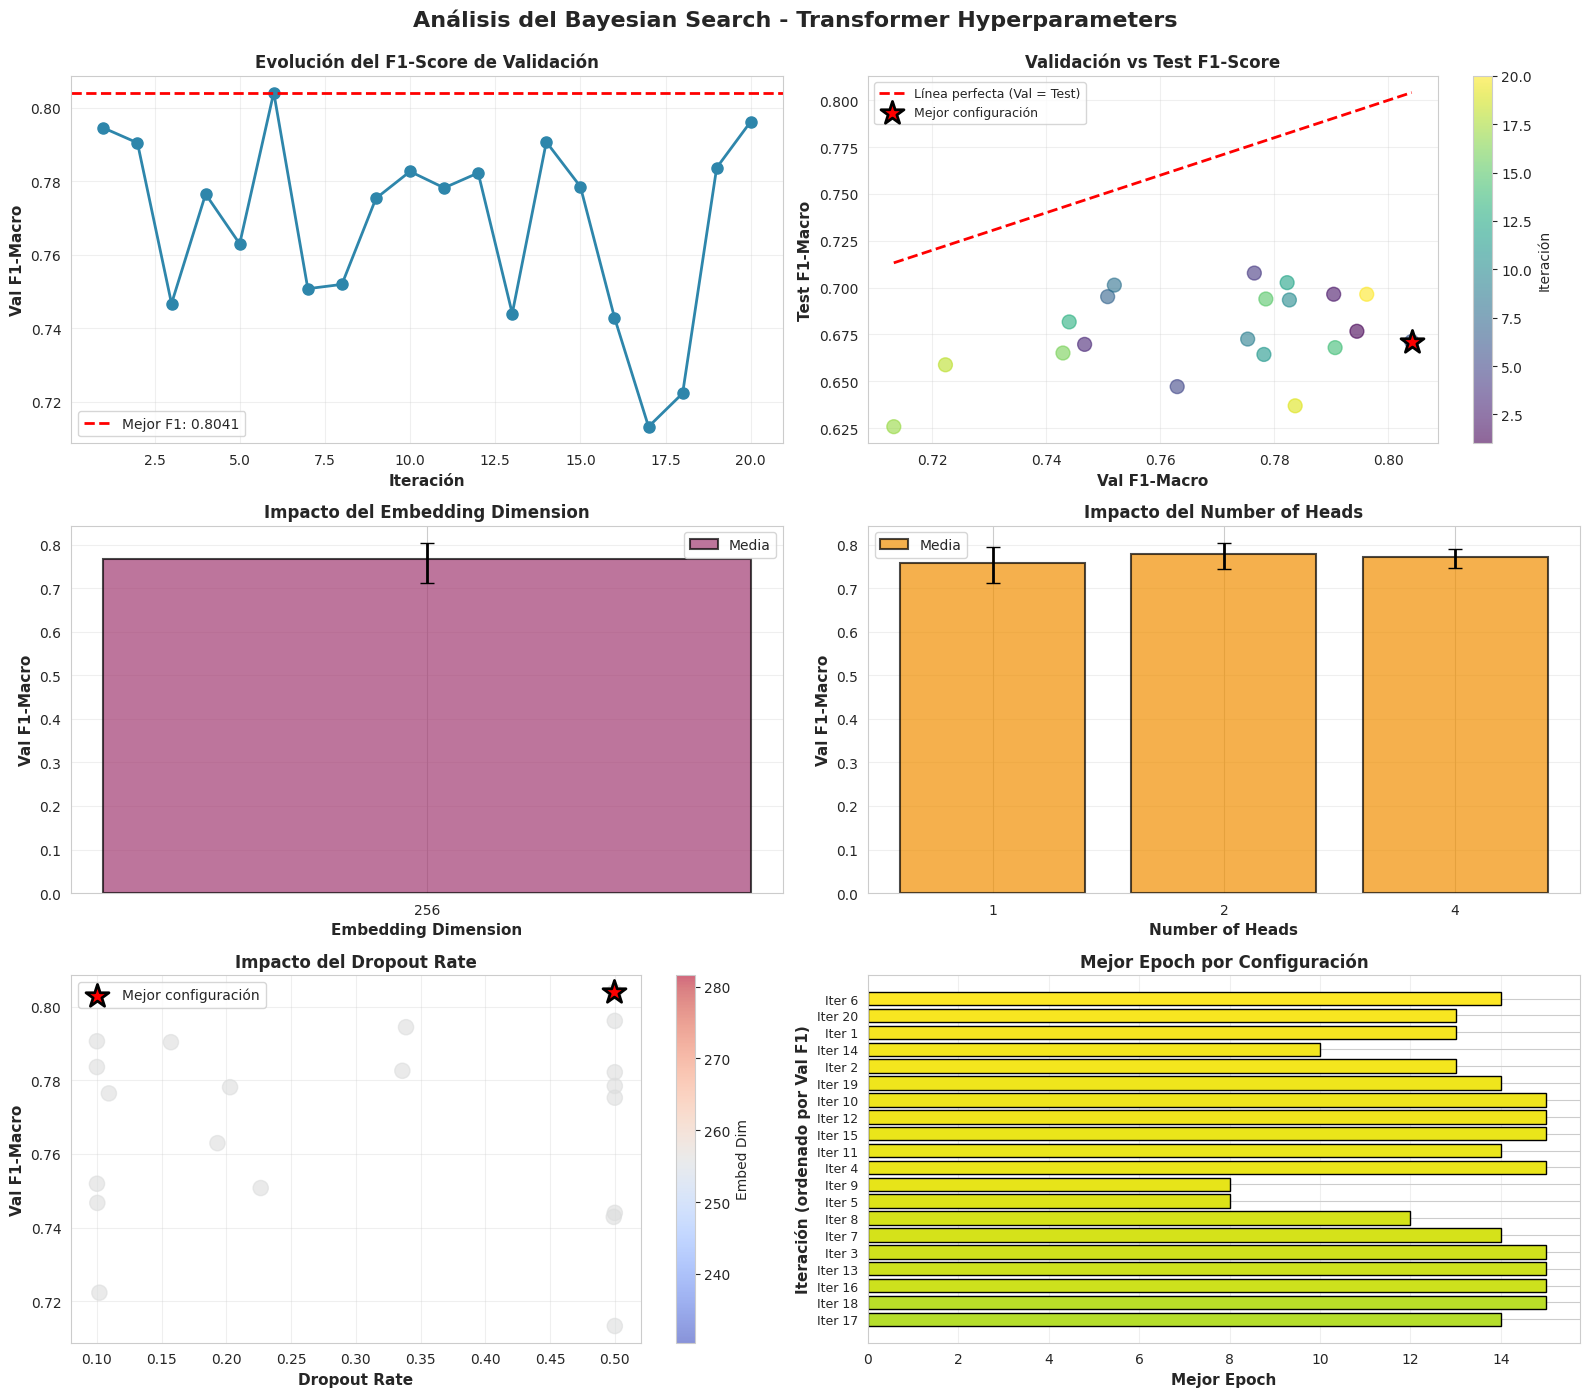


✅ Visualizaciones generadas con éxito!

🔥 HEATMAP: Interacción de Hiperparámetros


/tmp/ipython-input-3318321238.py:156: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_dropout_ff = results_df.pivot_table(


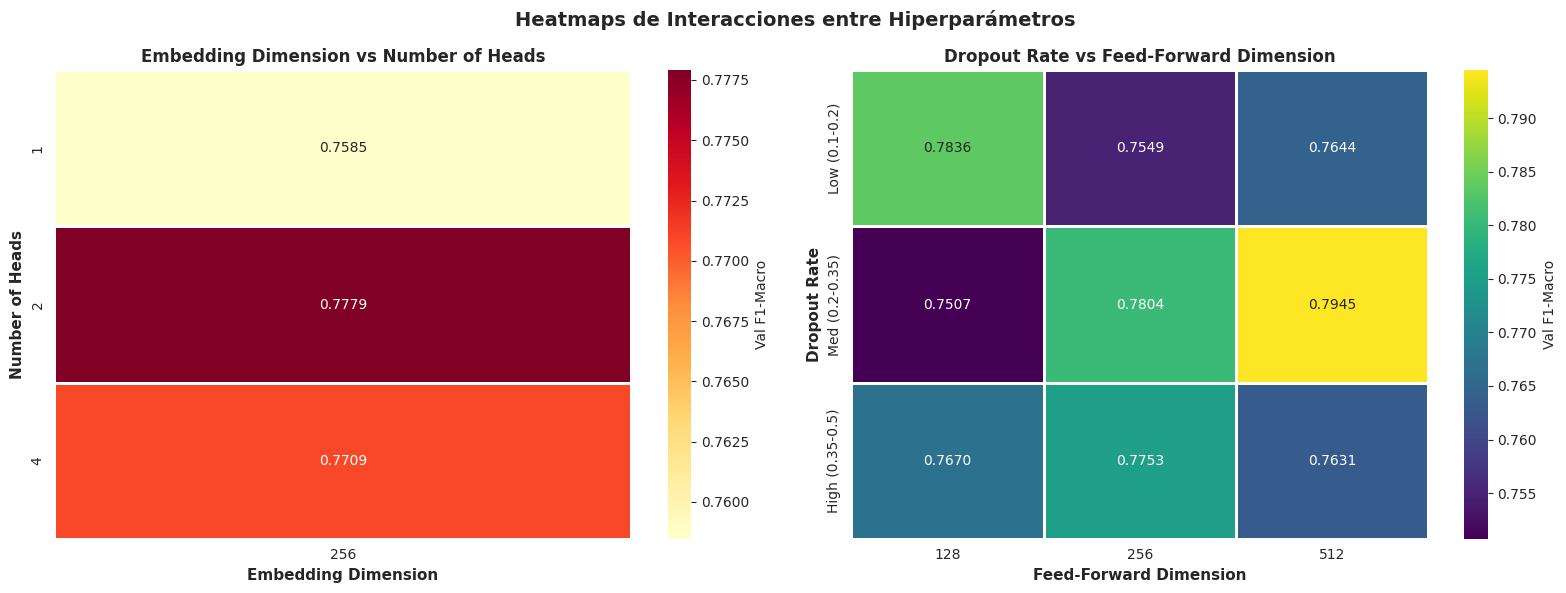


✅ Heatmaps generados con éxito!

🏆 TOP 10 CONFIGURACIONES

 iteration  embed_dim  num_heads  ff_dim  dropout_rate  batch_size  best_epoch  val_f1_macro  test_f1_macro
         6        256          2     128      0.499656          16          14      0.804083       0.671247
        20        256          2     128      0.500000          16          13      0.796196       0.696455
         1        256          1     512      0.338740          32          13      0.794474       0.676709
        14        256          4     128      0.100014          16          10      0.790649       0.667985
         2        256          2     256      0.157147          32          13      0.790398       0.696475
        19        256          4     512      0.100000          32          14      0.783641       0.636946
        10        256          4     256      0.335919          32          15      0.782628       0.693413
        12        256          2     512      0.500000          32          

In [32]:
# ============================================================
# VISUALIZACIONES DEL BAYESIAN SEARCH
# ============================================================

import matplotlib.pyplot as plt
import seaborn as sns

print("=" * 80)
print("📊 VISUALIZACIONES DEL BAYESIAN SEARCH")
print("=" * 80)

# Configurar estilo
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (16, 12)

# Crear figura con subplots
fig, axes = plt.subplots(3, 2, figsize=(16, 14))
fig.suptitle('Análisis del Bayesian Search - Transformer Hyperparameters',
             fontsize=16, fontweight='bold', y=0.995)

# 1. Evolución del F1-Score de Validación a lo largo de las iteraciones
ax1 = axes[0, 0]
iterations = results_df_sorted.sort_values('iteration')
ax1.plot(iterations['iteration'], iterations['val_f1_macro'],
         marker='o', linewidth=2, markersize=8, color='#2E86AB')
ax1.axhline(y=best_config['val_f1_macro'], color='red', linestyle='--',
            linewidth=2, label=f'Mejor F1: {best_config["val_f1_macro"]:.4f}')
ax1.set_xlabel('Iteración', fontsize=11, fontweight='bold')
ax1.set_ylabel('Val F1-Macro', fontsize=11, fontweight='bold')
ax1.set_title('Evolución del F1-Score de Validación', fontsize=12, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# 2. Comparación Val F1 vs Test F1
ax2 = axes[0, 1]
scatter = ax2.scatter(results_df['val_f1_macro'], results_df['test_f1_macro'],
                      s=100, alpha=0.6, c=results_df['iteration'], cmap='viridis')
ax2.plot([results_df['val_f1_macro'].min(), results_df['val_f1_macro'].max()],
         [results_df['val_f1_macro'].min(), results_df['val_f1_macro'].max()],
         'r--', linewidth=2, label='Línea perfecta (Val = Test)')
ax2.scatter(best_config['val_f1_macro'], best_config['test_f1_macro'],
            s=300, marker='*', color='red', edgecolors='black', linewidth=2,
            label='Mejor configuración', zorder=5)
ax2.set_xlabel('Val F1-Macro', fontsize=11, fontweight='bold')
ax2.set_ylabel('Test F1-Macro', fontsize=11, fontweight='bold')
ax2.set_title('Validación vs Test F1-Score', fontsize=12, fontweight='bold')
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax2, label='Iteración')

# 3. Impacto del Embedding Dimension
ax3 = axes[1, 0]
embed_grouped = results_df.groupby('embed_dim')['val_f1_macro'].agg(['mean', 'max', 'min'])
x_pos = range(len(embed_grouped))
ax3.bar(x_pos, embed_grouped['mean'], alpha=0.7, color='#A23B72',
        label='Media', edgecolor='black', linewidth=1.5)
ax3.errorbar(x_pos, embed_grouped['mean'],
             yerr=[embed_grouped['mean'] - embed_grouped['min'],
                   embed_grouped['max'] - embed_grouped['mean']],
             fmt='none', color='black', capsize=5, linewidth=2)
ax3.set_xticks(x_pos)
ax3.set_xticklabels([int(x) for x in embed_grouped.index])
ax3.set_xlabel('Embedding Dimension', fontsize=11, fontweight='bold')
ax3.set_ylabel('Val F1-Macro', fontsize=11, fontweight='bold')
ax3.set_title('Impacto del Embedding Dimension', fontsize=12, fontweight='bold')
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3, axis='y')

# 4. Impacto del Number of Heads
ax4 = axes[1, 1]
heads_grouped = results_df.groupby('num_heads')['val_f1_macro'].agg(['mean', 'max', 'min'])
x_pos = range(len(heads_grouped))
ax4.bar(x_pos, heads_grouped['mean'], alpha=0.7, color='#F18F01',
        label='Media', edgecolor='black', linewidth=1.5)
ax4.errorbar(x_pos, heads_grouped['mean'],
             yerr=[heads_grouped['mean'] - heads_grouped['min'],
                   heads_grouped['max'] - heads_grouped['mean']],
             fmt='none', color='black', capsize=5, linewidth=2)
ax4.set_xticks(x_pos)
ax4.set_xticklabels([int(x) for x in heads_grouped.index])
ax4.set_xlabel('Number of Heads', fontsize=11, fontweight='bold')
ax4.set_ylabel('Val F1-Macro', fontsize=11, fontweight='bold')
ax4.set_title('Impacto del Number of Heads', fontsize=12, fontweight='bold')
ax4.legend(fontsize=10)
ax4.grid(True, alpha=0.3, axis='y')

# 5. Dropout Rate vs F1-Score
ax5 = axes[2, 0]
scatter2 = ax5.scatter(results_df['dropout_rate'], results_df['val_f1_macro'],
                       s=120, alpha=0.6, c=results_df['embed_dim'], cmap='coolwarm')
ax5.scatter(best_config['dropout_rate'], best_config['val_f1_macro'],
            s=300, marker='*', color='red', edgecolors='black', linewidth=2,
            label='Mejor configuración', zorder=5)
ax5.set_xlabel('Dropout Rate', fontsize=11, fontweight='bold')
ax5.set_ylabel('Val F1-Macro', fontsize=11, fontweight='bold')
ax5.set_title('Impacto del Dropout Rate', fontsize=12, fontweight='bold')
ax5.legend(fontsize=10)
ax5.grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=ax5, label='Embed Dim')

# 6. Mejor Epoch por Configuración
ax6 = axes[2, 1]
colors = plt.cm.viridis(results_df_sorted['val_f1_macro'] / results_df_sorted['val_f1_macro'].max())
bars = ax6.barh(range(len(results_df_sorted)), results_df_sorted['best_epoch'],
                color=colors, edgecolor='black', linewidth=1)
ax6.set_yticks(range(len(results_df_sorted)))
ax6.set_yticklabels([f"Iter {int(x)}" for x in results_df_sorted['iteration']], fontsize=9)
ax6.set_xlabel('Mejor Epoch', fontsize=11, fontweight='bold')
ax6.set_ylabel('Iteración (ordenado por Val F1)', fontsize=11, fontweight='bold')
ax6.set_title('Mejor Epoch por Configuración', fontsize=12, fontweight='bold')
ax6.grid(True, alpha=0.3, axis='x')
ax6.invert_yaxis()

plt.tight_layout()
plt.show()

print("\n✅ Visualizaciones generadas con éxito!")

# ============================================================
# HEATMAP DE HIPERPARÁMETROS
# ============================================================

print("\n" + "=" * 80)
print("🔥 HEATMAP: Interacción de Hiperparámetros")
print("=" * 80)

# Crear pivot table para heatmap (embed_dim vs num_heads)
pivot_embed_heads = results_df.pivot_table(
    values='val_f1_macro',
    index='num_heads',
    columns='embed_dim',
    aggfunc='mean'
)

# Crear figura para heatmaps
fig2, axes2 = plt.subplots(1, 2, figsize=(16, 6))
fig2.suptitle('Heatmaps de Interacciones entre Hiperparámetros',
              fontsize=14, fontweight='bold')

# Heatmap 1: Embed Dim vs Num Heads
sns.heatmap(pivot_embed_heads, annot=True, fmt='.4f', cmap='YlOrRd',
            ax=axes2[0], cbar_kws={'label': 'Val F1-Macro'},
            linewidths=2, linecolor='white')
axes2[0].set_title('Embedding Dimension vs Number of Heads',
                   fontsize=12, fontweight='bold')
axes2[0].set_xlabel('Embedding Dimension', fontsize=11, fontweight='bold')
axes2[0].set_ylabel('Number of Heads', fontsize=11, fontweight='bold')

# Heatmap 2: Dropout vs FF Dim (si hay suficientes datos)
try:
    # Discretizar dropout para mejor visualización
    results_df['dropout_binned'] = pd.cut(results_df['dropout_rate'],
                                           bins=[0, 0.2, 0.35, 0.5],
                                           labels=['Low (0.1-0.2)', 'Med (0.2-0.35)', 'High (0.35-0.5)'])

    pivot_dropout_ff = results_df.pivot_table(
        values='val_f1_macro',
        index='dropout_binned',
        columns='ff_dim',
        aggfunc='mean'
    )

    sns.heatmap(pivot_dropout_ff, annot=True, fmt='.4f', cmap='viridis',
                ax=axes2[1], cbar_kws={'label': 'Val F1-Macro'},
                linewidths=2, linecolor='white')
    axes2[1].set_title('Dropout Rate vs Feed-Forward Dimension',
                       fontsize=12, fontweight='bold')
    axes2[1].set_xlabel('Feed-Forward Dimension', fontsize=11, fontweight='bold')
    axes2[1].set_ylabel('Dropout Rate', fontsize=11, fontweight='bold')
except:
    # Si falla, mostrar mensaje
    axes2[1].text(0.5, 0.5, 'Datos insuficientes\npara este heatmap',
                  ha='center', va='center', fontsize=14, fontweight='bold')
    axes2[1].set_title('Dropout Rate vs Feed-Forward Dimension',
                       fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✅ Heatmaps generados con éxito!")

# ============================================================
# RANKING DE CONFIGURACIONES
# ============================================================

print("\n" + "=" * 80)
print("🏆 TOP 10 CONFIGURACIONES")
print("=" * 80 + "\n")

top_10 = results_df_sorted.head(10)[['iteration', 'embed_dim', 'num_heads', 'ff_dim',
                                      'dropout_rate', 'batch_size', 'best_epoch',
                                      'val_f1_macro', 'test_f1_macro']]

print(top_10.to_string(index=False))

print("\n" + "=" * 80)

In [27]:
# Entrenar el mejor modelo encontrado con más epochs
print("=" * 80)
print("🎯 ENTRENANDO MEJOR MODELO CON CONFIGURACIÓN ÓPTIMA")
print("=" * 80)

# Usar los mejores hiperparámetros
best_embed_dim = int(best_config['embed_dim'])
best_num_heads = int(best_config['num_heads'])
best_ff_dim = int(best_config['ff_dim'])
best_dropout = best_config['dropout_rate']
best_batch_size = int(best_config['batch_size'])

print(f"\n📋 Configuración óptima:")
print(f"  - embed_dim: {best_embed_dim}")
print(f"  - num_heads: {best_num_heads}")
print(f"  - ff_dim: {best_ff_dim}")
print(f"  - dropout_rate: {best_dropout}")
print(f"  - batch_size: {best_batch_size}")
print(f"  - epochs: 15 (extendido para mejor entrenamiento)")

# Construir modelo final
best_model = Sequential([
    TokenAndPositionEmbedding(
        maxlen=max_sequence_length,
        vocab_size=len(tokenizer.word_index) + 1,
        embed_dim=best_embed_dim
    ),
    TransformerBlock(
        embed_dim=best_embed_dim,
        num_heads=best_num_heads,
        ff_dim=best_ff_dim,
        rate=best_dropout
    ),
    keras.layers.Dense(len(label_encoder.classes_), activation="softmax")
])

best_model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

# Callbacks: F1-score y Early Stopping
f1_callback_best = F1ScoreCallback(val_pad_sequences, val_labels_one_hot, val_sequence_lengths)
early_stopping_best = keras.callbacks.EarlyStopping(
    monitor='val_f1_macro',
    mode='max',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# Entrenar con más epochs
print("\n⏳ Entrenando modelo final con Early Stopping basado en Val F1-Macro...")
final_history = best_model.fit(
    train_pad_sequences,
    train_labels_one_hot,
    batch_size=best_batch_size,
    epochs=30,  # Aumentado porque Early Stopping parará antes si es necesario
    validation_data=(val_pad_sequences, val_labels_one_hot),
    callbacks=[f1_callback_best, early_stopping_best],
    verbose=1
)

# Evaluación final en test
print("\n" + "=" * 80)
print("📊 EVALUACIÓN FINAL EN TEST SET")
print("=" * 80)

test_loss, test_acc = best_model.evaluate(
    test_pad_sequences,
    test_labels_one_hot,
    batch_size=best_batch_size
)

# Predicciones
preds_final = best_model.predict(test_pad_sequences)
preds_idx_final = preds_to_index(preds_final, test_sequence_lengths)
test_labels_idx_final = preds_to_index(test_labels_one_hot, test_sequence_lengths)

# F1-score macro
f1_macro_final = f1_score(test_labels_idx_final, preds_idx_final, average='macro', zero_division=1.0)

print(f"\n✅ Métricas finales:")
print(f"  - Test Loss: {test_loss:.4f}")
print(f"  - Test Accuracy: {test_acc:.4f}")
print(f"  - Test F1-Macro: {f1_macro_final:.4f}")

# Classification report completo
print("\n" + "=" * 80)
print("📋 CLASSIFICATION REPORT DETALLADO")
print("=" * 80 + "\n")

# Get all unique labels that actually appear in the true or predicted test set
all_present_labels = np.unique(test_labels_idx_final + preds_idx_final).tolist()

# Filter target_names to only include the labels that are present
filtered_target_names = label_encoder.inverse_transform(all_present_labels).tolist()

print("\n💡 Nota: Recuerda que la métrica clave es F1-Macro, no Accuracy (debido al desbalanceo de clases en NER)")

print(classification_report(
    y_true=test_labels_idx_final,
    y_pred=preds_idx_final,
    labels=all_present_labels,
    target_names=filtered_target_names,
    zero_division=1.0
))


🎯 ENTRENANDO MEJOR MODELO CON CONFIGURACIÓN ÓPTIMA

📋 Configuración óptima:
  - embed_dim: 256
  - num_heads: 2
  - ff_dim: 128
  - dropout_rate: 0.49965645116000723
  - batch_size: 16
  - epochs: 15 (extendido para mejor entrenamiento)

⏳ Entrenando modelo final con Early Stopping basado en Val F1-Macro...
Epoch 1/30
255/255 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9252 - loss: 0.3389
  📊 Epoch 1 - Val F1-Macro: 0.5041
255/255 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.9253 - loss: 0.3382 - val_accuracy: 0.9771 - val_loss: 0.0707 - val_f1_macro: 0.5041
Epoch 2/30
247/255 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9800 - loss: 0.0587
  📊 Epoch 2 - Val F1-Macro: 0.6196
255/255 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9800 - loss: 0.0586 - val_accuracy: 0.9847 - val_loss: 0.0531 - val_f1_macro: 0.6196
Epoch 3/30
254/255 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9878 - loss: 0.0383
  📊 Epoch 3 - Val F1-Macro: 0.6660
255/255 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - ac

**Recurrente + Transformer**


In [31]:
# ============================================================
# MODELO HÍBRIDO: EMB + RECURRENT + POSITIONAL + TRANSFORMER
# ============================================================
# Arquitectura: Embedding → LSTM Bidireccional → Positional Encoding → Transformer (1 head)
# Rationale:
#   - LSTM captura dependencias secuenciales locales
#   - Transformer con 1 head captura dependencias globales sin solapar con LSTM
#   - Más de 1 head no tiene sentido porque las multi-head attentions "comerían"
#     la información ya procesada por la capa recurrente

import tensorflow as tf
import keras

print("=" * 80)
print("🔧 CONSTRUYENDO MODELO HÍBRIDO: LSTM + POSITIONAL + TRANSFORMER")
print("=" * 80)

# Hiperparámetros
embedding_dim = 256
lstm_units = 128  # Unidades LSTM
num_heads = 1  # Solo 1 head para no solapar con LSTM
ff_dim = 128
dropout_rate = 0.5
batch_size = 16
epochs = 15

vocab_size = len(tokenizer.word_index) + 1

print(f"\n📋 Configuración del modelo:")
print(f"  - Embedding Dim: {embedding_dim}")
print(f"  - LSTM Units: {lstm_units}")
print(f"  - Num Heads: {num_heads} (para no solapar con LSTM)")
print(f"  - FF Dim: {ff_dim}")
print(f"  - Dropout Rate: {dropout_rate}")
print(f"  - Vocab Size: {vocab_size}")
print(f"  - Max Sequence Length: {max_sequence_length}")

# Definir capa personalizada para añadir Positional Encoding
class AddPositionalEncoding(keras.layers.Layer):
    """
    Añade codificación posicional a los embeddings de salida del LSTM.
    Similar a TokenAndPositionEmbedding pero solo añade la parte posicional.
    """
    def __init__(self, maxlen, embed_dim):
        super().__init__()
        self.pos_emb = keras.layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, inputs):
        maxlen = tf.shape(inputs)[1]  # Longitud de secuencia
        positions = tf.range(start=0, limit=maxlen, delta=1)
        position_embeddings = self.pos_emb(positions)
        return inputs + position_embeddings

# Construir modelo
print("\n⚙️  Construyendo arquitectura...")

model_hybrid = Sequential([
    # 1. Embedding layer (sin positional encoding aún)
    keras.layers.Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        mask_zero=True,  # Ignorar padding
        name="embedding"
    ),

    # 2. LSTM Bidireccional (captura dependencias locales)
    Bidirectional(
        LSTM(lstm_units, return_sequences=True, dropout=dropout_rate),
        name="bidirectional_lstm"
    ),

    # 3. Añadir Positional Encoding después del LSTM
    AddPositionalEncoding(maxlen=max_sequence_length, embed_dim=lstm_units*2),

    # 4. Transformer Block (1 head para captura global sin solapar)
    TransformerBlock(
        embed_dim=lstm_units*2,  # Bidirectional LSTM duplica dimensión
        num_heads=num_heads,
        ff_dim=ff_dim,
        rate=dropout_rate
    ),

    # 5. Capa de salida (clasificación por token)
    keras.layers.Dense(len(label_encoder.classes_), activation="softmax", name="output")
])

# Compilar modelo
model_hybrid.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

print("\n✅ Arquitectura construida:")
model_hybrid.summary()

# Callbacks: F1-score y Early Stopping
early_stopping_hybrid = keras.callbacks.EarlyStopping(
    monitor='val_f1_macro',
    mode='max',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# Entrenar modelo
print("\n" + "=" * 80)
print("🚀 ENTRENAMIENTO DEL MODELO HÍBRIDO con Early Stopping")
print("=" * 80)
print("📊 Early Stopping: Monitorea Val F1-Macro, patience=5, restaura mejores pesos\n")

history_hybrid = model_hybrid.fit(
    train_pad_sequences,
    train_labels_one_hot,
    batch_size=batch_size,
    epochs=15,  # Aumentado porque Early Stopping parará antes si es necesario
    validation_data=(val_pad_sequences, val_labels_one_hot),
    callbacks=[early_stopping_hybrid],
    verbose=1
)

# Evaluación en test set
print("\n" + "=" * 80)
print("📊 EVALUACIÓN EN TEST SET")
print("=" * 80)

loss_hybrid, accuracy_hybrid = model_hybrid.evaluate(
    test_pad_sequences,
    test_labels_one_hot,
    batch_size=batch_size
)

print(f"\n✅ Resultados en Test:")
print(f"  - Test Loss: {loss_hybrid:.4f}")
print(f"  - Test Accuracy: {accuracy_hybrid:.4f}")

# Calcular F1-Score (métrica correcta para NER)
from sklearn.metrics import f1_score, classification_report

preds_hybrid = model_hybrid.predict(test_pad_sequences)
preds_idx_hybrid = preds_to_index(preds_hybrid, test_sequence_lengths)
test_labels_idx_hybrid = preds_to_index(test_labels_one_hot, test_sequence_lengths)

f1_macro_hybrid = f1_score(
    test_labels_idx_hybrid,
    preds_idx_hybrid,
    average='macro',
    zero_division=1.0
)

print(f"  - Test F1-Macro: {f1_macro_hybrid:.4f} ⭐")

# Classification report detallado
print("\n" + "=" * 80)
print("📋 CLASSIFICATION REPORT DETALLADO")
print("=" * 80 + "\n")

# Get all unique labels that actually appear in the true or predicted test set
all_present_labels_hybrid = np.unique(test_labels_idx_hybrid + preds_idx_hybrid).tolist()

# Filter target_names to only include the labels that are present
filtered_target_names_hybrid = label_encoder.inverse_transform(all_present_labels_hybrid).tolist()
print("   captura dependencias globales sin redundancia con el LSTM.")

print("\n💡 Arquitectura Híbrida: LSTM captura patrones locales, Transformer (1 head)")

print(classification_report(
    y_true=test_labels_idx_hybrid,
    y_pred=preds_idx_hybrid,
    zero_division=1.0,
    labels=all_present_labels_hybrid, # Explicitly specify the labels to consider
    target_names=filtered_target_names_hybrid # Provide corresponding names
))


🔧 CONSTRUYENDO MODELO HÍBRIDO: LSTM + POSITIONAL + TRANSFORMER

📋 Configuración del modelo:
  - Embedding Dim: 256
  - LSTM Units: 128
  - Num Heads: 1 (para no solapar con LSTM)
  - FF Dim: 128
  - Dropout Rate: 0.5
  - Vocab Size: 829
  - Max Sequence Length: 46

⚙️  Construyendo arquitectura...

✅ Arquitectura construida:


Model: "sequential_49"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_lstm              │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ add_positional_encoding_2       │ ?                      │   0 (unbuilt) │
│ (AddPositionalEncoding)         │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_block_24            │ ?                      │   0 (unbuilt) │
│ (TransformerBlock)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


🚀 ENTRENAMIENTO DEL MODELO HÍBRIDO con Early Stopping
📊 Early Stopping: Monitorea Val F1-Macro, patience=5, restaura mejores pesos

Epoch 1/15


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:965: UserWarning: Layer 'add_positional_encoding_2' (of type AddPositionalEncoding) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


255/255 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.9018 - loss: 0.5651 - val_accuracy: 0.9918 - val_loss: 0.0371
Epoch 2/15
 12/255 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9918 - loss: 0.0399

/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_f1_macro` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


255/255 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9931 - loss: 0.0306 - val_accuracy: 0.9952 - val_loss: 0.0210
Epoch 3/15
255/255 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9969 - loss: 0.0137 - val_accuracy: 0.9960 - val_loss: 0.0178
Epoch 4/15
255/255 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9979 - loss: 0.0082 - val_accuracy: 0.9965 - val_loss: 0.0171
Epoch 5/15
255/255 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9985 - loss: 0.0065 - val_accuracy: 0.9966 - val_loss: 0.0151
Epoch 6/15
255/255 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9987 - loss: 0.0050 - val_accuracy: 0.9968 - val_loss: 0.0148
Epoch 7/15
255/255 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9989 - loss: 0.0037 - val_accuracy: 0.9968 - val_loss: 0.0155
Epoch 8/15
255/255 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9992 - loss: 0.0031 - val_accuracy: 0.9971 - val_loss: 0.0149
Epoch 9/15
255/255 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9995 - loss: 0.0021 - val_accuracy: 0.996

---

<h1><a name="section-four"> 4. Lliurable </a></h1>

Heu d'entregar un document PDF de com a **màxim 10 pàgines** que incloga els resultats de tots els exercicis així com una explicació de cadascun dels resultats i de la modificació que heu fet. L'estructura del document és:

1. Introducció.
2. Experiments i Resultats (amb raonament).
3. Conclusions.

No cal que afegiu el vostre codi al document, podeu entregar el *notebook* juntament amb el document.

 ---